In [1]:
from helper import *
from data import *
from models import *

%matplotlib inline 
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus']=False 
pd.set_option('display.max_rows', 100)    
pd.set_option('display.max_colwidth', 100)    

%load_ext autoreload
%autoreload 2

data_path = os.getcwd() + "/data"

In [2]:
qa_edit = pd.read_csv(os.path.join(data_path, "qa_edit.csv")).dropna()
print(qa_edit.shape)
qa_edit = qa_edit.drop_duplicates(subset=['参考答案', '坐席回复'])
print(qa_edit.shape)

(123321, 4)
(37214, 4)


In [3]:
qa_edit['参考答案长度'] = qa_edit['参考答案'].apply(lambda x: len(x))
qa_edit['坐席回复长度'] = qa_edit['坐席回复'].apply(lambda x: len(x))
qa_edit['len_dif'] = qa_edit.loc[:,'参考答案长度']-qa_edit.loc[:,'坐席回复长度']
qa_edit['len_dif'] = qa_edit['len_dif'].apply(lambda x: abs(x))

In [4]:
display(qa_edit.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))

,参考答案长度,坐席回复长度,len_dif
count,37214.000000,37214.000000,37214.000000
mean,68.259929,31.489010,40.163782
std,44.578643,31.768405,42.935460
min,2.000000,1.000000,0.000000
1%,5.000000,2.000000,0.000000
25%,41.000000,10.000000,7.000000
50%,62.000000,20.000000,28.000000
75%,89.000000,42.000000,61.000000
99%,188.000000,142.000000,174.000000
max,537.000000,432.000000,530.000000


In [47]:
qa_edit = qa_edit[ qa_edit['参考答案长度']<150]

In [48]:
print(qa_edit.shape)
display(qa_edit.sample(n=5))

(24460, 9)


,用户问题,参考答案,坐席回复,回复类型,参考答案长度,坐席回复长度,len_dif,inter_rate,selflap_rate
75172,换货的链接,1自实际收货日期的次日起7天内退货部分已激活商品不支持无理由退有质量问题15天内可换货天无理由退货须保证商品含包装和附件完好,1自实际收货日期的次日起7天内退货部分已激活商品不支持无理由退有质量问题15天内可换货天无理由退货须保证商品含包装和附件完,编辑后采用,62,61,1,0.983871,1.000000
11075,我的苏宁卡咋办,实体苏宁卡需在激活后方可使用电子卡无需激活有效期为三年可以多次使用直到卡内金额用完截止如果苏宁卡过期可以到就近苏宁门店服务台去申请延期仅限延期一次并且只能延期29天,实体苏宁卡需在激活后方可使用电子卡无需激活有效期为三年可以多次使用直到卡内金额用完截止如果苏宁卡过期,编辑后采用,82,50,32,0.609756,1.000000
4474,亲，你好。想咨询你一个问题。,您太客气了有啥问题只管说Sunny的服务准则是至真至诚为您服务,您太客气了有啥问题只管说哦,编辑后采用,31,13,18,0.375000,0.923077
91512,价格保护多久？,亲亲现在不支持补钱哦只能补券呢苏宁自营实物商品自收货次日起7日内发生降价APP用户在-我的易购-我的服务-贵就赔PC端用户打开网址小时返回您的易购账户望亲了解感谢您的支持与理解,苏宁自营实物商品自收货次日起7日内发生降价APP用户在-我的易购-我的服务-贵就赔PC端用户打开网址小时返回您的易购账户,编辑后采用,88,60,28,0.681818,1.000000
70995,降得太厉害了,亲亲现在不支持补钱哦只能补券呢苏宁自营实物商品自收货次日起7日内发生降价APP用户在-我的易购-我的服务-贵就赔PC端用户打开网址小时返回您的易购账户望亲了解感谢您的支持与理解,亲亲现在不支持补钱哦只能补券呢苏宁自营实物商品自收货次日起7-31日内发生降价,编辑后采用,88,39,49,0.411111,0.948718


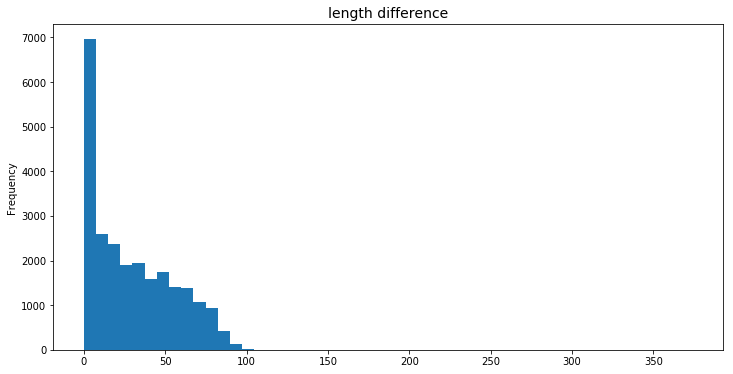

In [49]:
plt.figure(figsize=(12,6))
plt.title("length difference", fontsize=14)
ax1 = qa_edit['len_dif'].plot(kind='hist', bins=50)

In [50]:
greeting_answers = ['不客气亲爱哒很高兴为您服务感谢您对苏宁易购的支持如果您对我的服务满意记得给我个赞哈', '不客气亲爱的应该的哈',
                   'Hio￣▽￣)ブ很乐意为您效劳', '感谢您对苏宁易购的支持祝您生活愉快再见-', '不客气亲爱哒感谢您对我们的支持',
                   '好嘞','生气是魔鬼不要生气了亲爱的啦', '您稍等哈马上帮您查询核实', ')嘻嘻', '好的亲请问还有其他什么可以帮您的吗',
                   '好的还有什么可以帮您的吗', '很抱歉没有帮到您您可以点此转人工为您服务转人工','您好请问关于这款商品有什么可以帮到您',
                   '亲亲别生气别生气生活如此多娇给您带来不便十分抱歉呢','感谢您对苏宁易购的支持祝您生活愉快',
                   'Hio￣▽￣)ブ有任何问题都可以咨询我哦']

In [51]:
qa_edit.sample(n=100)

,用户问题,参考答案,坐席回复,回复类型,参考答案长度,坐席回复长度,len_dif,inter_rate,selflap_rate
74974,这个苏宁卡是不是只能买空调嘛。？,要购买礼品卡可以进入易购页面点击左上角的网站导航选择实体礼品卡根据提示操作即可[linkurl=]直接购买哦,您好苏宁卡仅支持购买“苏宁自营”商品“苏宁自营”商品指苏宁易购商城“全部商品分类”页中的“苏宁服务”类别商品详情页明确有“苏宁自营”标识且发票由苏宁提供的商品但苏宁海外购自营出版物投资金银类第...,编辑后采用,54,146,92,0.058201,0.075342
61894,你好，我想问一下，四川省都江堰蒲阳镇般若寺，这个地址可配送吗？,【苏宁发货】商品下单填写地址时能正常保存的就是在配送范围内的且支持送货上门服务；非苏宁发货商品建议联系购买页面上的在线客服确定下配送范围哟,商品页面显示【苏宁发货】商品下单填写地址时能正常保存的就是在配送范围内的且支持送货上门服务；非苏宁发货商品建议联系购买页面上的在线客服确定下配送范围哟,编辑后采用,69,75,6,0.920000,0.920000
4649,能不能换其他赠品,赠品是以商品页面介绍为准的哦若是个人原因需要退货赠品是需要一起退回的若是收到赠品存在质量问题活赠品收到与介绍不符的情况建议【联系客服MM】为您处理,亲这个没有办法的哦,编辑后采用,73,9,64,0.037975,0.333333
82432,移动空调带几米排热管？、,您好商品信息以页面展示为准哦颜色规格等可以在页面选择也可进入商品页面点击“包装及参数”查询到该商品的详细功能及参数配件信息等,您好稍等片刻小苏给您看下您的问题哦,编辑后采用,62,17,45,0.067568,0.294118
17066,长城燃油宝购买三件优惠多少？,您好所有的优惠活动可以关注易购主页或商品购买页的【促销活动】栏会有领券满减赠品等活动具体活动以页面为准优惠后的价格以支付时为准无法手动给您直接调价的哈,您好所有的优惠活动可以关注易购主页或商品购买页的【促销活动】栏会有领券满减赠品等活动具体活动以页面为准优惠后的价格以支付时为准无法手动给您直接调价的哈[飞吻],编辑后采用,75,79,4,0.949367,0.949367
101033,请问电话客服多少,亲苏宁热线是4008-365-365您有什么问题这边也是可以帮您处理的呢,您好亲苏宁热线是4008-365-365您有什么问题这边也是可以帮您查看,编辑后采用,36,36,0,0.800000,0.888889
47822,网上买的空调包安装吗？？,大家电提供安装服务部分商品享受苏宁上门免费安装服务具体可在商品详情页查看安装方,大家电提供安装服务部分商品享受苏宁上门免费安装服务具体可在商品详情页查看安装方,编辑后采用,39,39,0,1.000000,1.000000
17130,现在买，最近有效期多少？,所有商品价格以您订单提交实际支付金额为准哦如果商品有参加活动您可以加入购物车或者提交订单看下商品金额由于商品发货方式不同商户与自营商品价格会有一定差异但销售的都是正品行货哦,您好由于进货批次不同生产地点不同所以日期我们查不到呢不过您放心我司所售产品均在保质期内请您放心购买哦收货时如果您对保质期不满意可以选择拒收哦,编辑后采用,86,70,16,0.138686,0.271429
26219,重新下单明天能送货吗？,【苏宁发货】商品页面会显示预计到达时间以提交订单时显示的时间为准下单后按照您指定的日期配送非苏宁发货商品下单后在48小时内发货以快递信息为准下单后在订单中心查询物流动态,页面会显示预计到达时间以提交订单时显示的时间为准,编辑后采用,84,24,60,0.285714,1.000000
23787,订单上写的22号安装，怎么还没来,抱歉给您带来困扰了麻烦具体情况可以先和小妹描述下方便为您核实处理呢,抱歉给您带来困扰了请稍等我帮您看下的亲,编辑后采用,33,19,14,0.268293,0.578947


In [52]:
qa_edit = qa_edit[~qa_edit['参考答案'].isin(greeting_answers)]
print(qa_edit.shape)

(24460, 9)


In [53]:
def intersection_rate(s1, s2):
    count1 = collections.Counter(s1)
    count2 = collections.Counter(s2)
    return sum((count1&count2).values())/sum((count1|count2).values())

def selflap_rate(s1, s2):
    count1 = collections.Counter(s1)
    count2 = collections.Counter(s2)
    return sum((count1&count2).values())/sum((count2).values())

In [54]:
qa_edit['inter_rate'] = qa_edit[['参考答案', '坐席回复']].apply(lambda x: intersection_rate(x[0], x[1]), axis=1)
qa_edit['selflap_rate'] = qa_edit[['参考答案', '坐席回复']].apply(lambda x: selflap_rate(x[0], x[1]), axis=1)

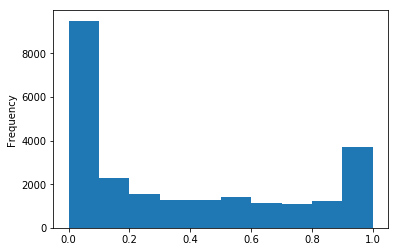

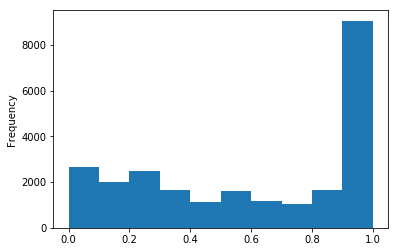

In [55]:
qa_edit.inter_rate.plot(kind='hist')
plt.show()
qa_edit.selflap_rate.plot(kind='hist')
plt.show()

In [56]:
qa_edit_lowInter = qa_edit[(qa_edit.inter_rate<0.8) & (qa_edit.selflap_rate<0.7)& (qa_edit['坐席回复长度']>5) ]
print(qa_edit_lowInter.shape)

(10324, 9)


In [57]:
qa_edit_lowInter.sample(n=100)

,用户问题,参考答案,坐席回复,回复类型,参考答案长度,坐席回复长度,len_dif,inter_rate,selflap_rate
72671,送货不满意,【苏宁发货】商品是由苏宁快递给您配送非苏宁发货商品由第三方快递给您配送,我去查一下你订单的物流,编辑后采用,35,11,24,0.000000,0.000000
88954,这不是欺骗吗,确实很抱歉给您带来不便为了更好更快速地解决您的问题点击转人工联系客服MM为您处理转人工,确实很抱歉给您带来不便您的补差问题已经上报反馈了我们专员最迟不超过24小时联系您的,编辑后采用,43,41,2,0.292308,0.463415
123320,請問瀋陽什麼時候到貨,【苏宁发货】商品页面会显示预计到达时间以提交订单时显示的时间为准下单后按照您指定的日期配送非苏宁发货商品下单后在48小时内发货以快递信息为准点击这里查询当前物流动态,亲亲由于是第三方配送所以要等物流更新后才会知道非苏宁发货商品下单后在48小时内发货以快递信息为准,编辑后采用,82,48,34,0.326531,0.666667
94879,我这笔订单买完又贵了,我司在下单支付未成功之前以及取消订单以后不提供库存和价格保护建议您点击到货通知或者降价通知哟,这边查询前期客服帮您反馈了不差的问题您这边保持手机畅通我们的专员1点左右会跟您联系,编辑后采用,46,41,5,0.087500,0.170732
123244,不是,嗯嗯那是怎样的呢,嗯嗯那是怎样的呢[太阳],编辑后采用,8,12,4,0.666667,0.666667
18929,无法重新买了,亲爱的无法下单的原因会在下单页面给出提示还请留意提示信息修改后再尝试下单；,是限购的商品是吗,编辑后采用,37,8,29,0.022727,0.125000
26155,烤箱一起发货啊,系统根据实时库存自动匹配发货仓所以不一定一并送达哦如需一起配送待送货师傅电联时您可与师傅协商将商品一起送达,您好核实您购买的商品安排厂家直接给您发货的哦为了保证商品安全会对商品进行严格包装后安排发货一般会在48小时内发货请您耐心等待下哦建议您可以随时关注我的订单详情查询发货状态,编辑后采用,53,85,32,0.121951,0.176471
34793,我这边去年买了一台风管式空调,原包装空调管标配2-3米,那时候没有安装是吗,编辑后采用,12,9,3,0.050000,0.111111
114230,解决了,非常抱歉可能我们之前的服务没有做好我跟您说声对不起您先不要着急我现在就为您处理问题,非常抱歉可能我们之前的服务没有做好感谢您的支持的哦有问题您在随时联系的呢,编辑后采用,41,36,5,0.400000,0.611111
10717,我不以旧換新了,以旧换新流程选择机型→描述商品状态→查看估价→选择上门交易方式→获得回收款电脑端：-我的服务-特色服务-以旧换新如果操作最后显示此地区暂时还不支持回收就回收不了后面会在继续扩大回收范围,亲亲稍等下哦小妹查看下,编辑后采用,92,11,81,0.019802,0.181818


In [63]:
qa_edit_lowInter = qa_edit_lowInter.sort_values('参考答案')

In [64]:
import numpy as np
n = qa_edit_lowInter.shape[0]
split = [int(0.1*n), int(0.2*n), int(0.3*n), int(0.4*n), int(0.5*n), int(0.6*n), int(0.7*n), int(0.8*n), int(0.9*n)]

In [65]:
f1,f2,f3,f4,f5,f6,f7,f8,f9,f10 = np.split(qa_edit_lowInter[['用户问题', '参考答案', '坐席回复']], split)

In [66]:
f1.to_excel('qa1.xlsx', index=False, encoding='utf_8_sig' )
f2.to_excel('qa2.xlsx', index=False, encoding='utf_8_sig' )
f3.to_excel('qa3.xlsx', index=False, encoding='utf_8_sig' )
f4.to_excel('qa4.xlsx', index=False, encoding='utf_8_sig' )
f5.to_excel('qa5.xlsx', index=False, encoding='utf_8_sig' )
f6.to_excel('qa6.xlsx', index=False, encoding='utf_8_sig' )
f7.to_excel('qa7.xlsx', index=False, encoding='utf_8_sig' )
f8.to_excel('qa8.xlsx', index=False, encoding='utf_8_sig' )
f9.to_excel('qa9.xlsx', index=False, encoding='utf_8_sig' )
f10.to_excel('qa10.xlsx', index=False, encoding='utf_8_sig' )